In [22]:
import pandas as pd
import numpy as np
train = pd.read_csv("train 2.csv")
out = []
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train['LotArea']) 


Outliers: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


# b. Detect outliers using IQR method


In [23]:
# IQR method
train = pd.read_csv("train 2.csv")
out = []
def iqr_outlier(df):
 q1 = df.quantile(0.25)
 q3 = df.quantile(0.75)
 iqr = q3-q1
 Lower_tail = q1-1.5*iqr
 Upper_tail = q3+1.5*iqr
 for i in df:
    if i> Upper_tail or i< Lower_tail:
     out.append(i)
 print("Outliers:",out)
iqr_outlier(train['LotArea'])


Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


# c. Detect outliers using percentile capping (WINSORIZATION method)


In [24]:
# Winzorization method
train = pd.read_csv("train.csv")
out = []
def winzorization_outlier(df):
 q1 = np.percentile(df,1)
 q3 = np.percentile(df,99)
 for i in df:
     if i> q3 or i< q1:
       out.append(i)
 print("Outliers:",out)
winzorization_outlier(train['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


# d. Spot outliers using Box and whisker plot (box plot)


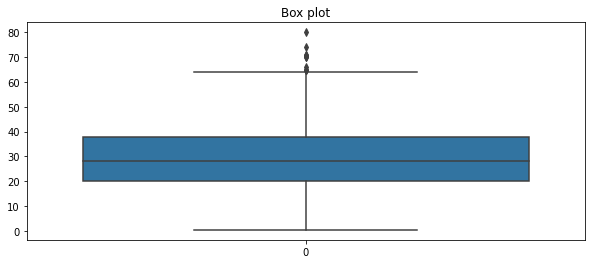

In [25]:
#Plotting Boxplot
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv("train.csv")
def Box_plots(df):
   plt.figure(figsize=(10,4))
   plt.title("Box plot")
   sns.boxplot(df)
plt.show()
Box_plots(train['Age'])

# e. Spot outlier using Scatter plot

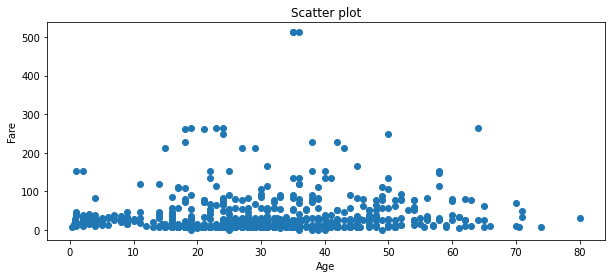

In [26]:
# Scatter plot to detect outliers
def scatter_plots(df1,df2):
 fig,ax = plt.subplots(figsize=(10,4))
 ax.scatter(df1,df2)
 ax.set_xlabel('Age')
 ax.set_ylabel('Fare')
 plt.title("Scatter plot")
 plt.show()
scatter_plots(train['Age'],train['Fare'])

# f.Spot outlier using Histogram plot

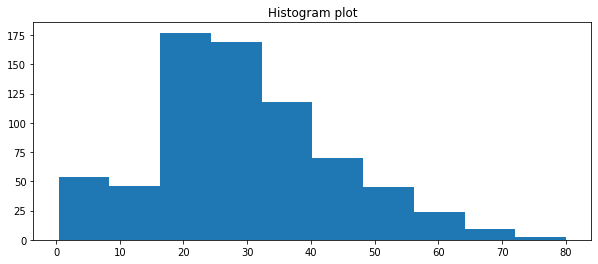

In [27]:
# Histogram
def hist_plots(df):
 plt.figure(figsize=(10,4))
 plt.title("Histogram plot")
 plt.hist(df)
 plt.show()
hist_plots(train['Age']) 

# g. Spot outlier using Distribution Plot

C:\Users\GPTBGK\AppData\Local\Temp\ipykernel_7060\3441960381.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


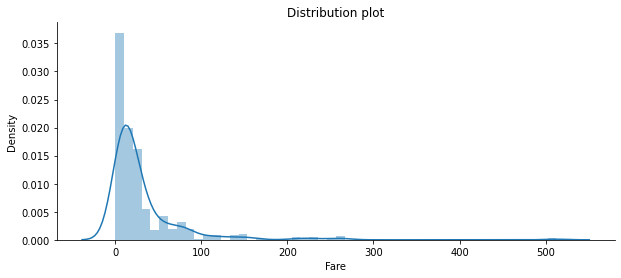

In [28]:
# Distribution plot
def dist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("Distribution plot")
    sns.distplot(df)
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

# h. Treat outliers using Deleting observations, Transforming values (Logtransformation) and mean imputation

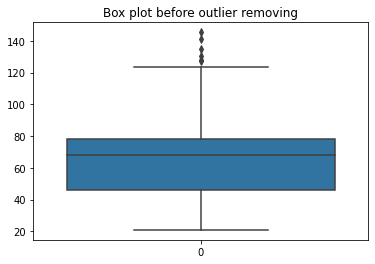

KeyError: 0

In [47]:
# Deleting the observations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv("cost-of-living-2018.csv")
sns.boxplot(train['Cost of Living Index'])
plt.title("Box plot before outlier removing")
plt.show()
def drop_outliers(df,field_name):
 iqr = 1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
 df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
 df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
drop_outliers(train,'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box plot after removing the outliers:")
plt.show()

In [30]:
# Scalling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
train = pd.read_csv("cost-of-living-2018.csv")
plt.hist(train['Cost of Living Index'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
train['Cost of Living Index'] = scaler.fit_transform(train['Cost of Living Index'].values.resh
plt.hist(train['Cost of Living Index'])
plt.title("Histogram after Scalling")
plt.show()

SyntaxError: invalid syntax (971183999.py, line 13)

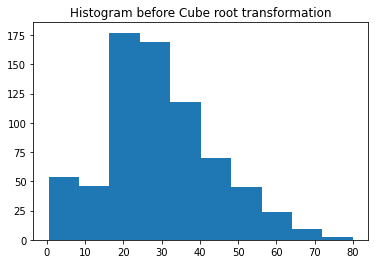

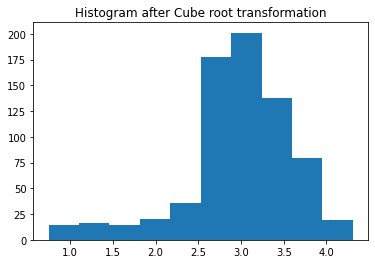

In [31]:
# Cube root transform
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv("train.csv")
plt.hist(train['Age'])
plt.title("Histogram before Cube root transformation")
plt.show()
train['Age'] = (train['Age']**(1/3))
plt.hist(train['Age'])
plt.title("Histogram after Cube root transformation")
plt.show()


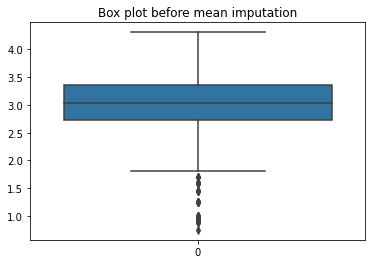

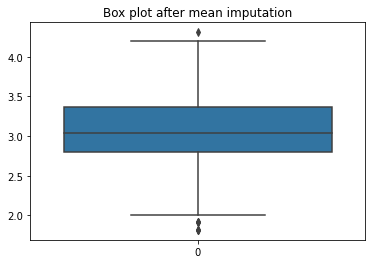

In [32]:
# Mean imputation
sns.boxplot(train['Age'])
plt.title("Box plot before mean imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1-1.5*iqr
Upper_tail = q3+1.5*iqr
m = np.mean(train['Age'])
for i in train['Age']:
    if i<Lower_tail or i>Upper_tail :
        train['Age'] = train['Age'].replace(i,m)
sns.boxplot(train['Age'])
plt.title("Box plot after mean imputation")
plt.show()

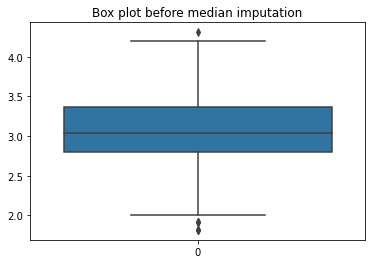

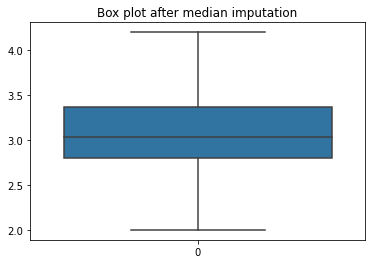

In [33]:
# Median imputation
sns.boxplot(train['Age'])
plt.title("Box plot before median imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1-1.5*iqr
Upper_tail = q3+1.5*iqr
med = np.median(train['Age'])
for i in train['Age']:
    if i<Lower_tail or i>Upper_tail :
        train['Age'] = train['Age'].replace(i,m)
sns.boxplot(train['Age'])
plt.title("Box plot after median imputation")
plt.show()

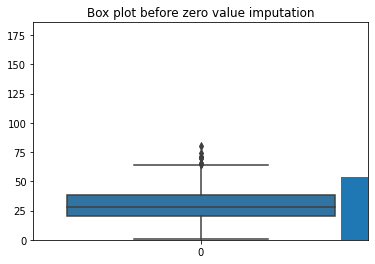

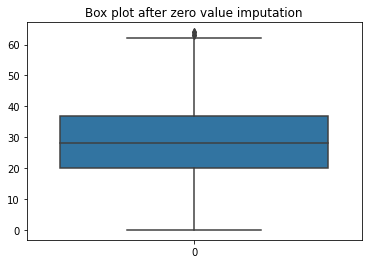

In [34]:
# Zero value imputation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv("train.csv")
plt.hist(train['Age'])
sns.boxplot(train['Age'])
plt.title("Box plot before zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1-1.5*iqr
Upper_tail = q3+1.5*iqr
for i in train['Age']:
    if i<Lower_tail or i>Upper_tail :
        train['Age'] = train['Age'].replace(i,0)
sns.boxplot(train['Age'])
plt.title("Box plot after zero value imputation")
plt.show()
